In [1]:
# Modulos y Datos
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Redes Neuronales : keras
from keras.models import Sequential
from keras.layers import Dense

# Dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/master/pima-indians-diabetes.csv")

print("Filas-Columnas", dataset.shape)

Filas-Columnas (767, 9)


In [6]:
# Definicion de X e y
X = dataset.iloc[:, 0:8]
y = dataset.iloc[:, 8]

print("""
Numero de variables independientes : %d
""" %(X.shape[1]))

print("Numero de niveles de la variable dependiente ", y.unique())
print("Districion de y \n", y.value_counts())


Numero de variables independientes : 8

Numero de niveles de la variable dependiente  [0 1]
Districion de y 
 1
0    500
1    267
Name: count, dtype: int64


In [8]:
# Diseño de nuestra red neuronal

# Creamos el modelo : INstancia de la clase Sequential
model1_Clase3 = Sequential()

#
# Agregamos capas a nuestra red neuronal
#

# Lista de funciones de activacion : https://keras.io/2.16/api/layers/activations/
# relu function
# sigmoid function
# softmax function
# softplus function
# softsign function
# tanh function
# selu function
# elu function
# exponential function


# La primera capa oculta tiene la informacion del numero de variables independientes
model1_Clase3.add(Dense(units = 15, activation = "relu",
                        input_dim = 8,
                        name = "PrimeraCapaOculta_CapaEntrada"))

# Agreguemos 4 capas ocultas
model1_Clase3.add(Dense(units = 25,
                        activation = "tanh",
                        name = "SegundaCapaOculta"))

model1_Clase3.add(Dense(units = 35,
                        activation = "exponential",
                        name = "TerceraCapaOculta"))

model1_Clase3.add(Dense(units = 12,
                        activation = "elu",
                        name = "CuartaCapaOculta"))

model1_Clase3.add(Dense(units = 5,
                        activation = "softsign",
                        name = "QuintaCapaOculta"))

#
# Agreguemos la capa de salida
#
# Aqui es donde debemos tener en consideracion la naturaleza de la variable de
# respuesta/target/dependiente y (Variable Aleatoria con Distribucion Binomial)
# Esta informacion sirve para asignar de manera adecuada/correcta la funcion
# de activacion de la capa de salida
model1_Clase3.add(Dense(units = 1, activation = "sigmoid",
                        name = "CapaSalida"))


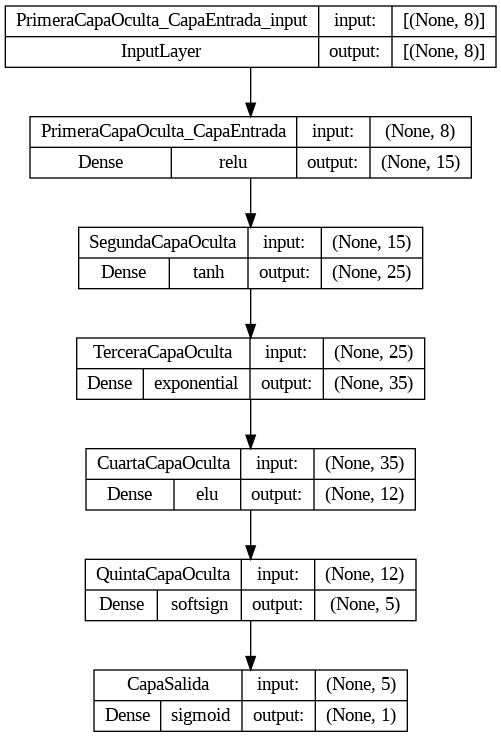

In [12]:
# Observemos a nuestro objeto model1_Clase3
from keras.utils import plot_model
plot_model(model1_Clase3,
           show_shapes = True,
           show_layer_names=True,
           show_layer_activations=True)


In [14]:
# Compilacion de nuestro modelo

# Lista de algoritmos/metodos de optimizacion
# Optimizers
# SGD
# RMSprop
# Adam
# AdamW
# Adadelta
# Adagrad
# Adamax
# Adafactor
# Nadam
# Ftrl

model1_Clase3.compile(loss= "binary_crossentropy",
                      optimizer = "Nadam",
                      metrics = ["accuracy", "AUC"])


# Ajustamos nuestros datos a la arquitectura
model1_Clase3.fit(X,y,batch_size = 10 , epochs = 100)

# Evaluacion del modelo
Precision = model1_Clase3.evaluate(X, y)[1]
AUC = model1_Clase3.evaluate(X,y)[2]



Epoch 1/100
77/77 [==============================] - 3s 3ms/step - loss: 0.6379 - accuracy: 0.6519 - auc: 0.5888
Epoch 2/100
77/77 [==============================] - 0s 3ms/step - loss: 0.6282 - accuracy: 0.6519 - auc: 0.6167
Epoch 3/100
77/77 [==============================] - 0s 2ms/step - loss: 0.6266 - accuracy: 0.6519 - auc: 0.6252
Epoch 4/100
77/77 [==============================] - 0s 2ms/step - loss: 0.6204 - accuracy: 0.6519 - auc: 0.6345
Epoch 5/100
77/77 [==============================] - 0s 3ms/step - loss: 0.6206 - accuracy: 0.6545 - auc: 0.6299
Epoch 6/100
77/77 [==============================] - 0s 3ms/step - loss: 0.6202 - accuracy: 0.6584 - auc: 0.6431
Epoch 7/100
77/77 [==============================] - 0s 2ms/step - loss: 0.6135 - accuracy: 0.6636 - auc: 0.6517
Epoch 8/100
77/77 [==============================] - 0s 3ms/step - loss: 0.6178 - accuracy: 0.6610 - auc: 0.6411
Epoch 9/100
77/77 [==============================] - 0s 4ms/step - loss: 0.6092 - accuracy: 0.66

NameError: name 'pritn' is not defined

In [15]:
# Mostremos esta informacion
print("""
Precision del modelo : %.3f
AUC del modelo : %.3f
""" %(Precision*100, AUC*100))


Precision del modelo : 67.666
AUC del modelo : 74.697



In [16]:
# Guardemos este primer modelo
model1_Clase3.save("ModeloClasificacionPimaIndians.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# Empaquetemos nuestro codigo para implementar una red neuronal en una funcion

def Pruebas1_ClfModel(Num_epocas):

  model1_Clase3 = Sequential()

  # La primera capa oculta tiene la informacion del numero de variables independientes
  model1_Clase3.add(Dense(units = 15, activation = "relu",
                          input_dim = 8,
                          name = "PrimeraCapaOculta_CapaEntrada"))

  # Agreguemos 4 capas ocultas
  model1_Clase3.add(Dense(units = 25,
                          activation = "tanh",
                          name = "SegundaCapaOculta"))

  model1_Clase3.add(Dense(units = 35,
                          activation = "exponential",
                          name = "TerceraCapaOculta"))

  model1_Clase3.add(Dense(units = 12,
                          activation = "elu",
                          name = "CuartaCapaOculta"))

  model1_Clase3.add(Dense(units = 5,
                          activation = "softsign",
                          name = "QuintaCapaOculta"))

  #
  # Agreguemos la capa de salida
  #
  # Aqui es donde debemos tener en consideracion la naturaleza de la variable de
  # respuesta/target/dependiente y (Variable Aleatoria con Distribucion Binomial)
  # Esta informacion sirve para asignar de manera adecuada/correcta la funcion
  # de activacion de la capa de salida
  model1_Clase3.add(Dense(units = 1, activation = "sigmoid",
                          name = "CapaSalida"))


  model1_Clase3.compile(loss= "binary_crossentropy",
                        optimizer = "Nadam",
                        metrics = ["accuracy", "AUC"])


  # Ajustamos nuestros datos a la arquitectura
  model1_Clase3.fit(X,y,batch_size = 10 , epochs = Num_epocas)

  # Evaluacion del modelo
  Precision = model1_Clase3.evaluate(X, y)[1]
  AUC = model1_Clase3.evaluate(X,y)[2]


  return Precision*100, AUC*100

In [22]:
# Consideremos lo siguientes numeros de epocas : 300, 350, 400, 500
DictPruebas1 = {}
for epocas in [300, 350, 400, 500]:
  Ejecucion = Pruebas1_ClfModel(epocas)
  DictPruebas1[epocas] = [Ejecucion[0], Ejecucion[1]]

df_Pruebas1 = pd.DataFrame(DictPruebas1)
df_Pruebas1

Epoch 1/300
77/77 [==============================] - 3s 4ms/step - loss: 0.6427 - accuracy: 0.6441 - auc: 0.5608
Epoch 2/300
77/77 [==============================] - 0s 4ms/step - loss: 0.6224 - accuracy: 0.6454 - auc: 0.6655
Epoch 3/300
77/77 [==============================] - 0s 4ms/step - loss: 0.6126 - accuracy: 0.6610 - auc: 0.6684
Epoch 4/300
77/77 [==============================] - 0s 5ms/step - loss: 0.6070 - accuracy: 0.6662 - auc: 0.6698
Epoch 5/300
77/77 [==============================] - 0s 4ms/step - loss: 0.6098 - accuracy: 0.6428 - auc: 0.6735
Epoch 6/300
77/77 [==============================] - 0s 4ms/step - loss: 0.6174 - accuracy: 0.6415 - auc: 0.6416
Epoch 7/300
77/77 [==============================] - 0s 6ms/step - loss: 0.6072 - accuracy: 0.6623 - auc: 0.6749
Epoch 8/300
77/77 [==============================] - 0s 2ms/step - loss: 0.5968 - accuracy: 0.6754 - auc: 0.6914
Epoch 9/300
77/77 [==============================] - 0s 2ms/step - loss: 0.5965 - accuracy: 0.67

300        350        400        500
0  79.139507  75.749671  75.749671  79.661018
1  85.900748  85.035205  80.775285  87.716854

In [22]:
# Probar con 1000 epocas 1500 epocas y 2000 epocas


In [23]:
# Empaquetemos nuestro codigo para implementar una red neuronal en una funcion

def Pruebas1_ClfModel(Num_epocas):

  model1_Clase3 = Sequential()

  # La primera capa oculta tiene la informacion del numero de variables independientes
  model1_Clase3.add(Dense(units = 15, activation = "relu",
                          input_dim = 8,
                          name = "PrimeraCapaOculta_CapaEntrada"))

  # Agreguemos 4 capas ocultas
  model1_Clase3.add(Dense(units = 25,
                          activation = "tanh",
                          name = "SegundaCapaOculta"))

  model1_Clase3.add(Dense(units = 35,
                          activation = "exponential",
                          name = "TerceraCapaOculta"))

  model1_Clase3.add(Dense(units = 12,
                          activation = "elu",
                          name = "CuartaCapaOculta"))

  model1_Clase3.add(Dense(units = 5,
                          activation = "softsign",
                          name = "QuintaCapaOculta"))

  # Agreguemos otras 4 capas ocultas mas
  model1_Clase3.add(Dense(units = 10,
                          activation = "selu",
                          name = "SextaCapaOculta"))
  model1_Clase3.add(Dense(units = 20,
                          activation = "sigmoid",
                          name = "SeptimaCapaOculta"))
  model1_Clase3.add(Dense(units = 35,
                          activation = "relu",
                          name = "OctavaCapaOculta"))
  model1_Clase3.add(Dense(units = 50,
                          activation = "selu",
                          name = "NovenaCapaOculta"))

  #
  # Agreguemos la capa de salida
  #
  # Aqui es donde debemos tener en consideracion la naturaleza de la variable de
  # respuesta/target/dependiente y (Variable Aleatoria con Distribucion Binomial)
  # Esta informacion sirve para asignar de manera adecuada/correcta la funcion
  # de activacion de la capa de salida
  model1_Clase3.add(Dense(units = 1, activation = "sigmoid",
                          name = "CapaSalida"))


  model1_Clase3.compile(loss= "binary_crossentropy",
                        optimizer = "Nadam",
                        metrics = ["accuracy", "AUC"])


  # Ajustamos nuestros datos a la arquitectura
  model1_Clase3.fit(X,y,batch_size = 10 , epochs = Num_epocas)

  # Evaluacion del modelo
  Precision = model1_Clase3.evaluate(X, y)[1]
  AUC = model1_Clase3.evaluate(X,y)[2]


  return Precision*100, AUC*100



Epoch 1/300
77/77 [==============================] - 4s 3ms/step - loss: 0.6509 - accuracy: 0.6415 - auc: 0.5079
Epoch 2/300
77/77 [==============================] - 0s 3ms/step - loss: 0.6476 - accuracy: 0.6519 - auc: 0.5254
Epoch 3/300
77/77 [==============================] - 0s 3ms/step - loss: 0.6468 - accuracy: 0.6519 - auc: 0.5253
Epoch 4/300
77/77 [==============================] - 0s 3ms/step - loss: 0.6370 - accuracy: 0.6519 - auc: 0.5862
Epoch 5/300
77/77 [==============================] - 0s 3ms/step - loss: 0.6360 - accuracy: 0.6467 - auc: 0.5947
Epoch 6/300
77/77 [==============================] - 0s 3ms/step - loss: 0.6256 - accuracy: 0.6480 - auc: 0.6192
Epoch 7/300
77/77 [==============================] - 0s 3ms/step - loss: 0.6375 - accuracy: 0.6415 - auc: 0.5871
Epoch 8/300
77/77 [==============================] - 0s 3ms/step - loss: 0.6213 - accuracy: 0.6519 - auc: 0.6322
Epoch 9/300
77/77 [==============================] - 0s 3ms/step - loss: 0.6204 - accuracy: 0.65

300        350        400        500
0  71.186441  75.749671  75.749671  79.009128
1  74.948692  85.035205  80.775285  86.757302

In [26]:
# Consideremos lo siguientes numeros de epocas : 300, 350, 400, 500
DictPruebas2 = {}
for epocas in [300,
              #  350, 400,
               500]:
  Ejecucion = Pruebas1_ClfModel(epocas)
  DictPruebas2[epocas] = [Ejecucion[0], Ejecucion[1]]

df_Pruebas2 = pd.DataFrame(DictPruebas2)
df_Pruebas2

Epoch 1/300
77/77 [==============================] - 4s 3ms/step - loss: 0.6399 - accuracy: 0.6519 - auc: 0.5803
Epoch 2/300
77/77 [==============================] - 0s 3ms/step - loss: 0.6177 - accuracy: 0.6519 - auc: 0.6432
Epoch 3/300
77/77 [==============================] - 0s 3ms/step - loss: 0.6075 - accuracy: 0.6545 - auc: 0.6568
Epoch 4/300
77/77 [==============================] - 0s 3ms/step - loss: 0.6067 - accuracy: 0.6402 - auc: 0.6555
Epoch 5/300
77/77 [==============================] - 0s 3ms/step - loss: 0.6029 - accuracy: 0.6415 - auc: 0.6653
Epoch 6/300
77/77 [==============================] - 0s 3ms/step - loss: 0.6055 - accuracy: 0.6519 - auc: 0.6707
Epoch 7/300
77/77 [==============================] - 0s 3ms/step - loss: 0.5999 - accuracy: 0.6636 - auc: 0.6721
Epoch 8/300
77/77 [==============================] - 0s 3ms/step - loss: 0.6137 - accuracy: 0.6610 - auc: 0.6495
Epoch 9/300
77/77 [==============================] - 0s 5ms/step - loss: 0.6122 - accuracy: 0.67

300        500
0  78.487617  76.401567
1  86.683524  83.695507

In [27]:
# La parte donde definimos el numero de capas ocultas y las funciones de activacion
# a utilizar empaquetemosla en una funcion

def MakeArch1(model_Seq,
              ListaNumeroNeuronas,
              ListaFuncionesAct):
  """
  Esta funcion busca agregar capas ocultas a una instancia de la clase
  Sequential que ya tiene la primera capa oculta con el numero de variables independientes
  """
  NumCapasOcultas = len(ListaNumeroNeuronas)
  for nuevaCapa in range(NumCapasOcultas):
    model_Seq.add(Dense(units = ListaNumeroNeuronas[nuevaCapa],
                       activation = ListaFuncionesAct[nuevaCapa]))
  return model_Seq


In [37]:
# Empaquetemos nuestro codigo para implementar una red neuronal en una funcion

def Pruebas1_ClfModel_Ver2(Num_epocas,
                           ListaNumeroNeuronas,
                           ListaFuncionesAct):

  model1_Clase3 = Sequential()

  # La primera capa oculta tiene la informacion del numero de variables independientes
  model1_Clase3.add(Dense(units = 15, activation = "relu",
                          input_dim = 8,
                          name = "PrimeraCapaOculta_CapaEntrada"))

  model1_Clase3 = MakeArch1(model1_Clase3,
                            ListaNumeroNeuronas,
                            ListaFuncionesAct)

  #
  # Agreguemos la capa de salida
  #
  # Aqui es donde debemos tener en consideracion la naturaleza de la variable de
  # respuesta/target/dependiente y (Variable Aleatoria con Distribucion Binomial)
  # Esta informacion sirve para asignar de manera adecuada/correcta la funcion
  # de activacion de la capa de salida
  model1_Clase3.add(Dense(units = 1, activation = "sigmoid",
                          name = "CapaSalida"))

  # Mostremos la arquitectura de mi red neuronal
  # Observemos a nuestro objeto model1_Clase3
  from keras.utils import plot_model
  plot_model(model = model1_Clase3,
             to_file = "model1_clase3"+ "NumEpocas" + str(Num_epocas)+ ".png",
             show_shapes = True,
             show_layer_names=True,
             show_layer_activations=True)


  model1_Clase3.compile(loss= "binary_crossentropy",
                        optimizer = "Nadam",
                        metrics = ["accuracy", "AUC"])


  # Ajustamos nuestros datos a la arquitectura
  model1_Clase3.fit(X,y,batch_size = 10 , epochs = Num_epocas)

  # Evaluacion del modelo
  Precision = model1_Clase3.evaluate(X, y)[1]
  AUC = model1_Clase3.evaluate(X,y)[2]

  return Precision*100, AUC*100

In [39]:
# hagamos una prueba usando Pruebas1_ClfModel_Ver2
Pruebas1_ClfModel_Ver2(50,
                       [10,12,14],
                       ["selu", "elu", "tanh"])

Epoch 1/50
77/77 [==============================] - 2s 2ms/step - loss: 0.7288 - accuracy: 0.5385 - auc: 0.4419
Epoch 2/50
77/77 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.6441 - auc: 0.5904
Epoch 3/50
77/77 [==============================] - 0s 2ms/step - loss: 0.6306 - accuracy: 0.6532 - auc: 0.6204
Epoch 4/50
77/77 [==============================] - 0s 2ms/step - loss: 0.6267 - accuracy: 0.6480 - auc: 0.6298
Epoch 5/50
77/77 [==============================] - 0s 2ms/step - loss: 0.6195 - accuracy: 0.6519 - auc: 0.6512
Epoch 6/50
77/77 [==============================] - 0s 3ms/step - loss: 0.6170 - accuracy: 0.6558 - auc: 0.6653
Epoch 7/50
77/77 [==============================] - 0s 2ms/step - loss: 0.6112 - accuracy: 0.6558 - auc: 0.6718
Epoch 8/50
77/77 [==============================] - 0s 3ms/step - loss: 0.6120 - accuracy: 0.6584 - auc: 0.6724
Epoch 9/50
77/77 [==============================] - 0s 2ms/step - loss: 0.6034 - accuracy: 0.6545 - auc:

(77.70534753799438, 84.69662666320801)

In [ ]:
# Necesitamos evolucionar : Pruebas1_ClfModel_Ver2
  # Primer problema : El numero de neuronas de la primera capa oculta es fijo
  # Segundo problema : BUscamos que el usuario tambien seleccione el metodo de optimizacion

In [40]:
# Resolvamos el segundo problema
# Empaquetemos nuestro codigo para implementar una red neuronal en una funcion

def Pruebas1_ClfModel_Ver3(Num_epocas,opt,
                           ListaNumeroNeuronas,
                           ListaFuncionesAct):

  model1_Clase3 = Sequential()

  # La primera capa oculta tiene la informacion del numero de variables independientes
  model1_Clase3.add(Dense(units = 15, activation = "relu",
                          input_dim = 8,
                          name = "PrimeraCapaOculta_CapaEntrada"))

  model1_Clase3 = MakeArch1(model1_Clase3,
                            ListaNumeroNeuronas,
                            ListaFuncionesAct)

  #
  # Agreguemos la capa de salida
  #
  # Aqui es donde debemos tener en consideracion la naturaleza de la variable de
  # respuesta/target/dependiente y (Variable Aleatoria con Distribucion Binomial)
  # Esta informacion sirve para asignar de manera adecuada/correcta la funcion
  # de activacion de la capa de salida
  model1_Clase3.add(Dense(units = 1, activation = "sigmoid",
                          name = "CapaSalida"))

  # Mostremos la arquitectura de mi red neuronal
  # Observemos a nuestro objeto model1_Clase3
  from keras.utils import plot_model
  plot_model(model = model1_Clase3,
             to_file = "model1_clase3"+ "NumEpocas" + str(Num_epocas)+ ".png",
             show_shapes = True,
             show_layer_names=True,
             show_layer_activations=True)


  model1_Clase3.compile(loss= "binary_crossentropy",
                        optimizer = opt,
                        metrics = ["accuracy", "AUC"])


  # Ajustamos nuestros datos a la arquitectura
  model1_Clase3.fit(X,y,batch_size = 10 , epochs = Num_epocas)

  # Evaluacion del modelo
  Precision = model1_Clase3.evaluate(X, y)[1]
  AUC = model1_Clase3.evaluate(X,y)[2]

  return Precision*100, AUC*100

In [41]:
# Probemos nuestra funcion  Pruebas1_ClfModel_Ver3
Pruebas1_ClfModel_Ver3(Num_epocas= 10,
                       opt = "adam",
                       ListaNumeroNeuronas= [20,30,8],
                       ListaFuncionesAct= ["selu", "elu", "exponential"])

Epoch 1/10
77/77 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.6519 - auc: 8.9888e-05
Epoch 2/10
77/77 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6519 - auc: 0.0000e+00
Epoch 3/10
77/77 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6519 - auc: 0.0000e+00
Epoch 4/10
77/77 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6519 - auc: 0.0000e+00
Epoch 5/10
77/77 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6519 - auc: 0.0000e+00
Epoch 6/10
77/77 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6519 - auc: 0.0000e+00
Epoch 7/10
77/77 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6519 - auc: 0.0000e+00
Epoch 8/10
77/77 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6519 - auc: 0.0000e+00
Epoch 9/10
77/77 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6519 -

(65.18904566764832, 0.0)

In [43]:
# Otra prueba de  nuestra funcion  Pruebas1_ClfModel_Ver3 usando como optimizar "Ftrl"
Pruebas1_ClfModel_Ver3(Num_epocas= 50,
                       opt = "Ftrl",
                       ListaNumeroNeuronas= [20,30,8],
                       ListaFuncionesAct= ["selu", "elu", "exponential"])

Epoch 1/50
77/77 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.6636 - auc: 8.5019e-04
Epoch 2/50
77/77 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6519 - auc: 0.0000e+00
Epoch 3/50
77/77 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6519 - auc: 0.0000e+00
Epoch 4/50
77/77 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6519 - auc: 0.0000e+00
Epoch 5/50
77/77 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6519 - auc: 0.0000e+00
Epoch 6/50
77/77 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6519 - auc: 0.0000e+00
Epoch 7/50
77/77 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6519 - auc: 0.0000e+00
Epoch 8/50
77/77 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6519 - auc: 0.0000e+00
Epoch 9/50
77/77 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6519 -

(65.18904566764832, 0.0)

In [47]:
# Tercera prueba de nuestra funcion  Pruebas1_ClfModel_Ver3
Pruebas1_ClfModel_Ver3(Num_epocas= 50,
                       opt = "nadam",
                       ListaNumeroNeuronas= [20,30,8],
                       ListaFuncionesAct= ["selu", "elu", "softplus"])

Epoch 1/50
77/77 [==============================] - 3s 2ms/step - loss: 0.7835 - accuracy: 0.5880 - auc: 0.4921
Epoch 2/50
77/77 [==============================] - 0s 3ms/step - loss: 0.6388 - accuracy: 0.6558 - auc: 0.6436
Epoch 3/50
77/77 [==============================] - 0s 2ms/step - loss: 0.6233 - accuracy: 0.6688 - auc: 0.6796
Epoch 4/50
77/77 [==============================] - 0s 2ms/step - loss: 0.6126 - accuracy: 0.6806 - auc: 0.6828
Epoch 5/50
77/77 [==============================] - 0s 3ms/step - loss: 0.5950 - accuracy: 0.6858 - auc: 0.6946
Epoch 6/50
77/77 [==============================] - 0s 5ms/step - loss: 0.6102 - accuracy: 0.6819 - auc: 0.6786
Epoch 7/50
77/77 [==============================] - 0s 4ms/step - loss: 0.5798 - accuracy: 0.6962 - auc: 0.7183
Epoch 8/50
77/77 [==============================] - 0s 4ms/step - loss: 0.5814 - accuracy: 0.6975 - auc: 0.7158
Epoch 9/50
77/77 [==============================] - 0s 4ms/step - loss: 0.5660 - accuracy: 0.6936 - auc:

(72.62060046195984, 82.96517133712769)

In [48]:
# Cuarta prueba de nuestra funcion  Pruebas1_ClfModel_Ver3
Pruebas1_ClfModel_Ver3(Num_epocas= 500,
                       opt = "SGD",
                       ListaNumeroNeuronas= [20,30,8, 12,28,96, 128],
                       ListaFuncionesAct= ["selu", "elu", "softplus", "relu", "elu", "tanh", "relu"])

Epoch 1/500
77/77 [==============================] - 1s 2ms/step - loss: 0.6584 - accuracy: 0.6349 - auc: 0.5313
Epoch 2/500
77/77 [==============================] - 0s 2ms/step - loss: 0.5914 - accuracy: 0.6832 - auc: 0.7180
Epoch 3/500
77/77 [==============================] - 0s 2ms/step - loss: 0.5707 - accuracy: 0.7014 - auc: 0.7328
Epoch 4/500
77/77 [==============================] - 0s 2ms/step - loss: 0.5735 - accuracy: 0.7053 - auc: 0.7233
Epoch 5/500
77/77 [==============================] - 0s 2ms/step - loss: 0.5607 - accuracy: 0.7145 - auc: 0.7455
Epoch 6/500
77/77 [==============================] - 0s 2ms/step - loss: 0.5731 - accuracy: 0.7080 - auc: 0.7260
Epoch 7/500
77/77 [==============================] - 0s 3ms/step - loss: 0.5625 - accuracy: 0.7040 - auc: 0.7436
Epoch 8/500
77/77 [==============================] - 0s 3ms/step - loss: 0.5506 - accuracy: 0.7275 - auc: 0.7549
Epoch 9/500
77/77 [==============================] - 0s 2ms/step - loss: 0.5764 - accuracy: 0.69

(77.18383073806763, 89.38913345336914)

In [50]:
#
from keras.optimizers import SGD
OptClase3_SGD  =  SGD(learning_rate = 10**(-3), momentum = 0.01)
OptClase3_SGD

In [57]:
# Quinta prueba de nuestra funcion  Pruebas1_ClfModel_Ver3

# Definamos nuestro optimizador
OptClase3_SGD = SGD(learning_rate = 10**(-3), momentum = 0.0)
Pruebas1_ClfModel_Ver3(Num_epocas= 500,
                       opt =  OptClase3_SGD,
                       ListaNumeroNeuronas= [20,30,8, 12,28,96, 128],
                       ListaFuncionesAct= ["selu", "elu", "softplus", "relu", "elu", "tanh", "relu"])

Epoch 1/500
77/77 [==============================] - 1s 2ms/step - loss: 0.6756 - accuracy: 0.6167 - auc: 0.5147
Epoch 2/500
77/77 [==============================] - 0s 2ms/step - loss: 0.6557 - accuracy: 0.6519 - auc: 0.4556
Epoch 3/500
77/77 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.6519 - auc: 0.5286
Epoch 4/500
77/77 [==============================] - 0s 2ms/step - loss: 0.6422 - accuracy: 0.6519 - auc: 0.5716
Epoch 5/500
77/77 [==============================] - 0s 2ms/step - loss: 0.6368 - accuracy: 0.6506 - auc: 0.6160
Epoch 6/500
77/77 [==============================] - 0s 3ms/step - loss: 0.6333 - accuracy: 0.6493 - auc: 0.6352
Epoch 7/500
77/77 [==============================] - 0s 2ms/step - loss: 0.6293 - accuracy: 0.6545 - auc: 0.6499
Epoch 8/500
77/77 [==============================] - 0s 2ms/step - loss: 0.6254 - accuracy: 0.6584 - auc: 0.6663
Epoch 9/500
77/77 [==============================] - 0s 2ms/step - loss: 0.6217 - accuracy: 0.65

(81.74706697463989, 89.57902789115906)